In [5]:
import os
import cv2
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS:1}
    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
                    #print(str(e))

        np.random.shuffle(self.training_data)
        with open("training_data.pkl", "wb") as f:
            pickle.dump(self.training_data, f)
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

PetImages/Cat


100%|██████████| 12501/12501 [00:24<00:00, 509.96it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:25<00:00, 482.20it/s]


Cats: 12476
Dogs: 12470


In [3]:
training_data = np.load("training_data.pkl", allow_pickle = True)
print(len(training_data))

24946


In [4]:
print(training_data[1])

[array([[ 87, 163, 190, ..., 138,  91, 148],
       [ 72, 108,  95, ..., 132, 121,  70],
       [112,  83, 114, ..., 130, 116, 104],
       ...,
       [118, 147, 143, ..., 139, 129, 143],
       [145, 127, 147, ..., 142, 142, 136],
       [194, 148, 186, ..., 161, 145, 151]], dtype=uint8), array([0., 1.])]


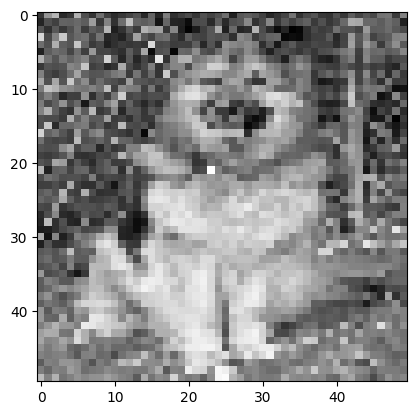

In [7]:
plt.imshow(training_data[1][0], cmap="gray")
plt.show()